In [ ]:
#Read in the National ILI dataset

import pandas as pd
from scipy.stats import f_oneway
data = pd.read_csv('/content/ILINet.csv', header = 0)

In [ ]:
#View the National ILI dataset

data.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,2010,40,1.10939,1.13505,2627,1677,X,3142,627,400,8473,1838,746485
1,National,X,2010,41,1.24341,1.25256,2953,1779,X,3522,649,444,9347,1875,746230
2,National,X,2010,42,1.25726,1.24570,3044,1898,X,3641,690,411,9684,1907,777397
3,National,X,2010,43,1.25734,1.26774,3226,1754,X,3822,682,420,9904,1929,781234
4,National,X,2010,44,1.43414,1.43723,3451,1981,X,4397,736,455,11020,1947,766753


In [ ]:
print(data.columns)

Index(['REGION TYPE', 'REGION', 'YEAR', 'WEEK', '% WEIGHTED ILI',
       '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS'],
      dtype='object')


In [ ]:
#See how many NAs are in each column

data.shape
data.isnull().sum()

,0
REGION TYPE,0
REGION,0
YEAR,0
WEEK,0
% WEIGHTED ILI,0
%UNWEIGHTED ILI,0
AGE 0-4,0
AGE 25-49,0
AGE 25-64,0
AGE 5-24,0


In [ ]:
#See the column names
data.columns

Index(['REGION TYPE', 'REGION', 'YEAR', 'WEEK', '% WEIGHTED ILI',
       '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS'],
      dtype='object')

In [ ]:
#Run some Summary Statistics
data.describe()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,7.810000e+02
mean,2017.738796,26.551857,2.147403,2.165474,7151.576184,7666.704225,10301.060179,3124.346991,2631.468630,30875.156210,2511.459667,1.275806e+06
std,4.337185,15.061462,1.434589,1.437509,6451.756174,9028.542526,11080.966398,3721.430445,3461.387042,32718.203777,939.045508,6.938728e+05
min,2010.000000,1.000000,0.529813,0.644743,729.000000,635.000000,1125.000000,203.000000,151.000000,3202.000000,1175.000000,4.685650e+05
25%,2014.000000,14.000000,1.162870,1.196140,2551.000000,2011.000000,3522.000000,788.000000,564.000000,10158.000000,1811.000000,7.393750e+05
50%,2018.000000,27.000000,1.672360,1.678810,5045.000000,4458.000000,6003.000000,1878.000000,1357.000000,19165.000000,2097.000000,8.821630e+05
75%,2021.000000,40.000000,2.542530,2.592480,9650.000000,9738.000000,13424.000000,3985.000000,3516.000000,39896.000000,3345.000000,1.877580e+06
max,2025.000000,53.000000,7.843780,7.797830,39539.000000,59976.000000,76137.000000,26664.000000,24947.000000,222652.000000,4273.000000,2.890229e+06


In [ ]:
import pandas as pd

# Create date column
data["DATE"] = pd.to_datetime(
    data["YEAR"].astype(str) + data["WEEK"].astype(str) + "1",
    format="%G%V%u"
)

# sort DataFrame by date
data = data.sort_values("DATE").reset_index(drop=True)

print(data.head())



  REGION TYPE REGION  YEAR  WEEK  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  \
0    National      X  2010    40         1.10939          1.13505     2627   
1    National      X  2010    41         1.24341          1.25256     2953   
2    National      X  2010    42         1.25726          1.24570     3044   
3    National      X  2010    43         1.25734          1.26774     3226   
4    National      X  2010    44         1.43414          1.43723     3451   

   AGE 25-49 AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
0       1677         X      3142        627     400      8473   
1       1779         X      3522        649     444      9347   
2       1898         X      3641        690     411      9684   
3       1754         X      3822        682     420      9904   
4       1981         X      4397        736     455     11020   

   NUM. OF PROVIDERS  TOTAL PATIENTS       DATE  
0               1838          746485 2010-10-04  
1               1875          746230 201

In [ ]:
#Hypothesis test for regions
regions = data[["region", "Total_ILI"]]
region_groups = [group['Total_ILI'].values for name, group in regions.groupby('region')]

f_stat, p_val = f_oneway(*region_groups)

print(f"F-statistic = {f_stat:.4f}")
print(f"P-value = {p_val:.4f}")

F-statistic = 554.3224
P-value = 0.0000


EDA


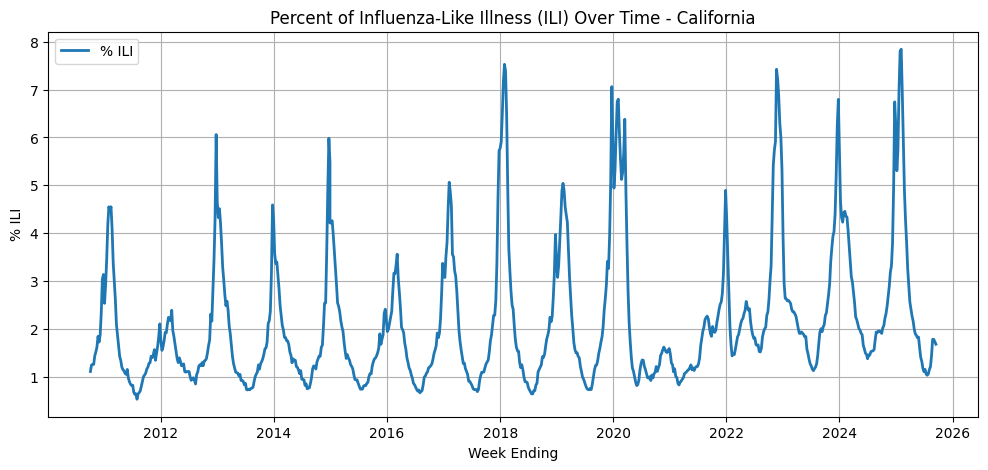

In [ ]:

#Trends of ILI over time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.plot(data['DATE'], data['% WEIGHTED ILI'], label='% ILI', linewidth=2)
plt.title('Percent of Influenza-Like Illness (ILI) Over Time - California')
plt.xlabel('Week Ending')
plt.ylabel('% ILI')
plt.grid(True)
plt.legend()
plt.show()

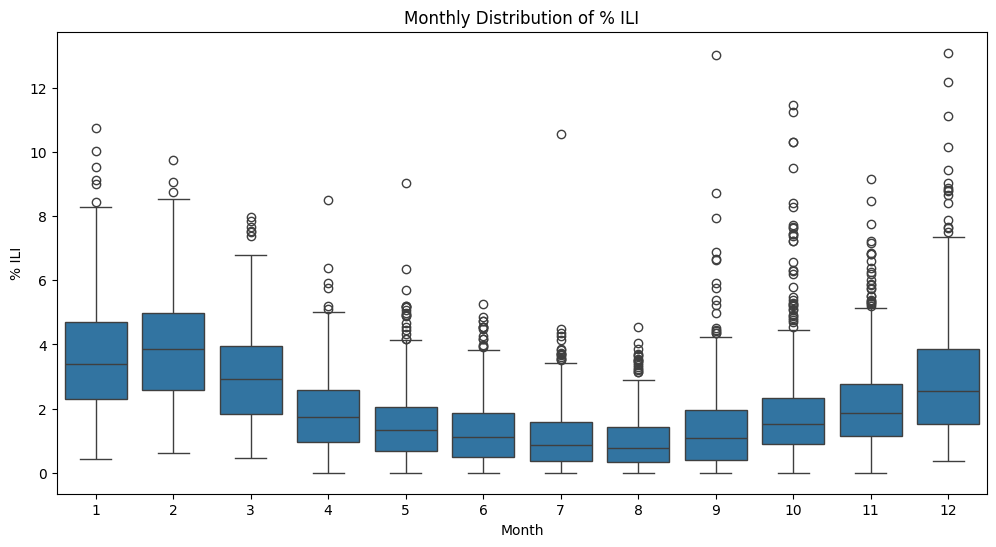

In [ ]:
#Seeing which months have higher cases

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

data['year'] = data['weekending'].dt.year
data['month'] = data['weekending'].dt.month

plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='Percent_ILI', data=data)
plt.title('Monthly Distribution of % ILI')
plt.xlabel('Month')
plt.ylabel('% ILI')
plt.show()

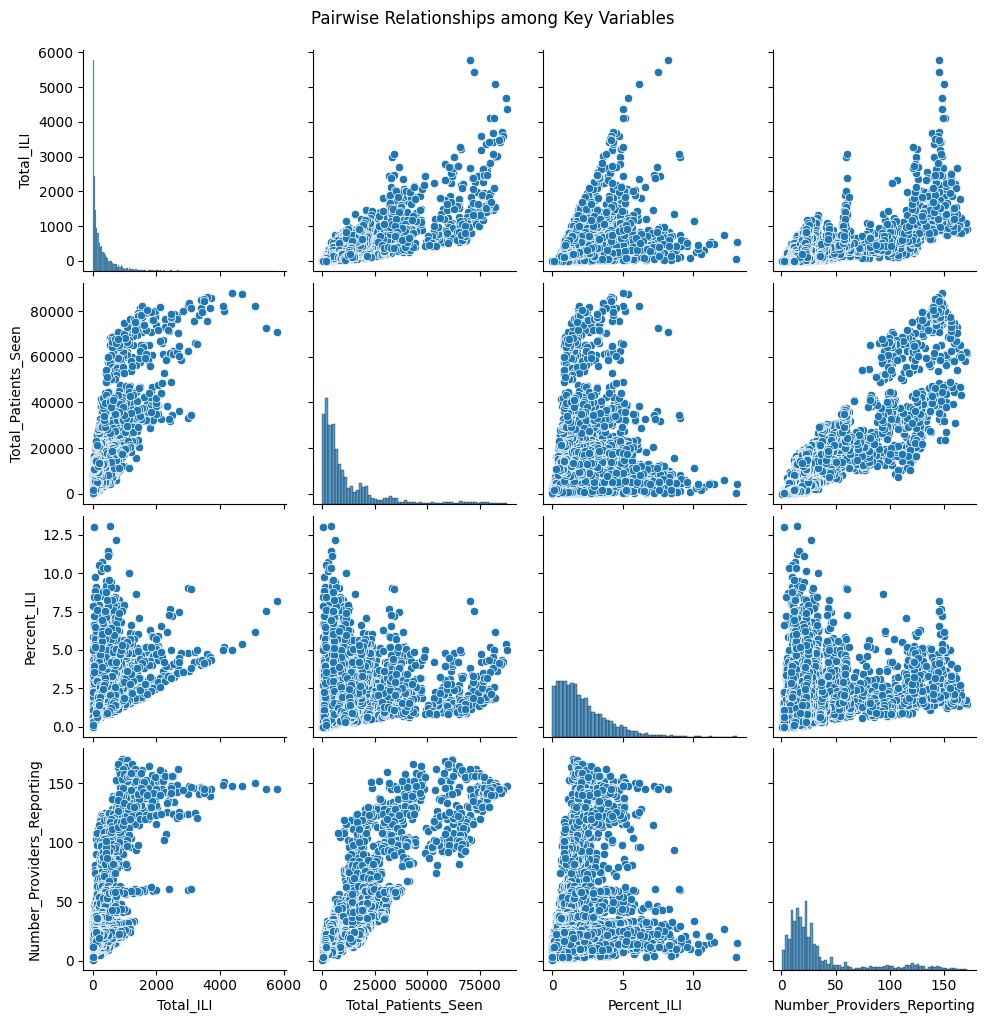

In [ ]:
#Relationships between each variable

sns.pairplot(data[['Total_ILI','Total_Patients_Seen','Percent_ILI','Number_Providers_Reporting']])
plt.suptitle('Pairwise Relationships among Key Variables', y=1.02)
plt.show()

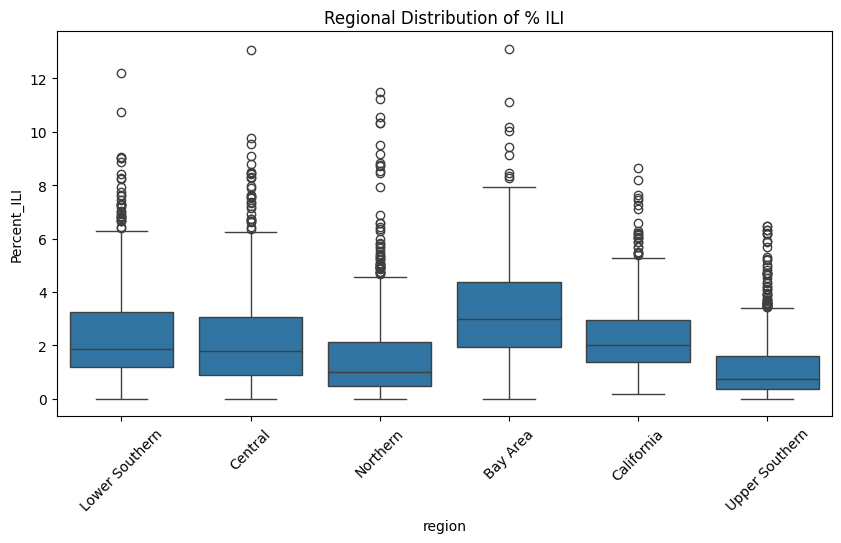

In [ ]:
#ILI by region

plt.figure(figsize=(10,5))
sns.boxplot(x='region', y='Percent_ILI', data=data)
plt.title('Regional Distribution of % ILI')
plt.xticks(rotation=45)
plt.show()

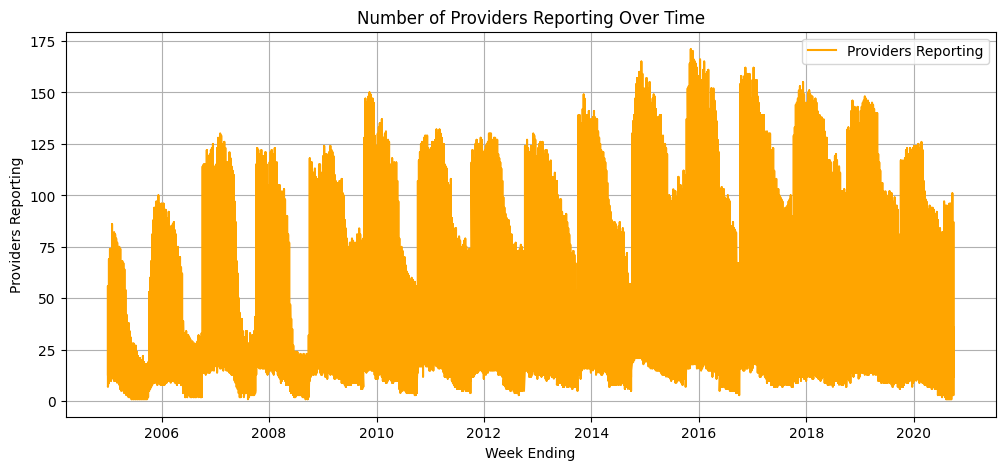

In [ ]:
#number of providers over time

plt.figure(figsize=(12,5))
plt.plot(data['weekending'], data['Number_Providers_Reporting'], color='orange', label='Providers Reporting')
plt.title('Number of Providers Reporting Over Time')
plt.xlabel('Week Ending')
plt.ylabel('Providers Reporting')
plt.grid(True)
plt.legend()
plt.show()

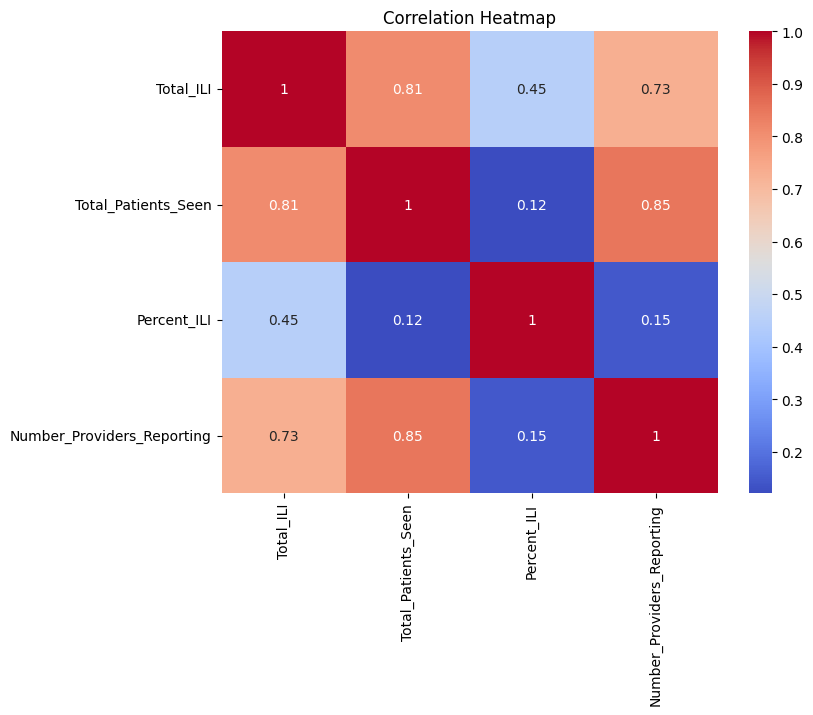

In [ ]:
#Variable correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data[['Total_ILI','Total_Patients_Seen','Percent_ILI','Number_Providers_Reporting']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
threshold = data['Percent_ILI'].mean() + 2*data['Percent_ILI'].std()
data['outbreak_flag'] = (data['Percent_ILI'] > threshold).astype(int)

plt.figure(figsize=(12,5))
plt.plot(data['weekending'], data['Percent_ILI'], label='% ILI', color='steelblue')
plt.axhline(threshold, color='red', linestyle='--', label='Outbreak Threshold')
plt.scatter(data.loc[data['outbreak_flag']==1,'weekending'],
            data.loc[data['outbreak_flag']==1,'Percent_ILI'], color='red', label='Outbreaks')
plt.title('Identified Outbreak Weeks')
plt.xlabel('Week Ending')
plt.ylabel('% ILI')
plt.legend()
plt.show()

KeyError: 'Percent_ILI'

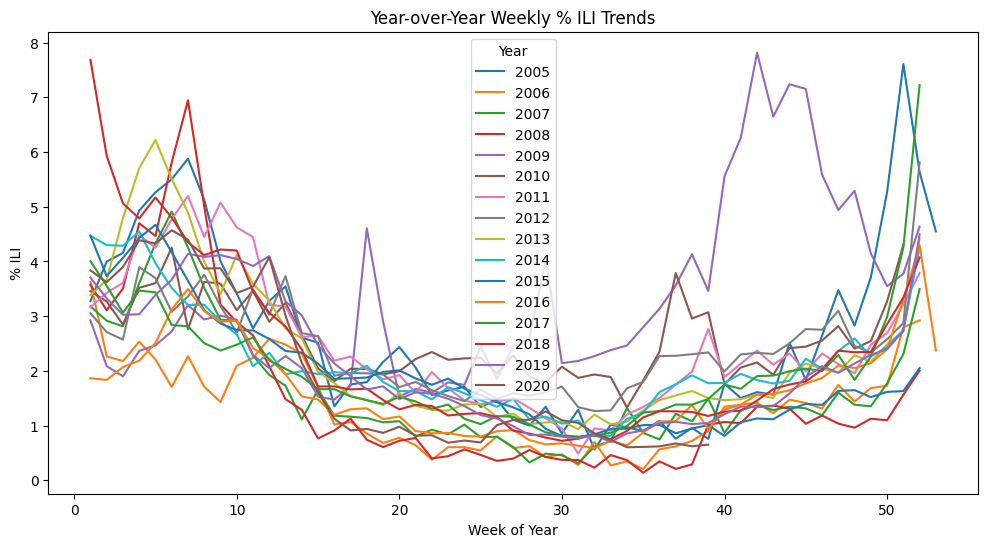

In [ ]:
pivot = data.pivot_table(index=data['weekending'].dt.isocalendar().week,
                       columns=data['year'], values='Percent_ILI')
pivot.plot(figsize=(12,6))
plt.title('Year-over-Year Weekly % ILI Trends')
plt.xlabel('Week of Year')
plt.ylabel('% ILI')
plt.legend(title='Year')
plt.show()

ARIMA Model

In [ ]:
# import all the libraries that i need

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Set the date as the index
data.set_index('DATE', inplace=True)

# Extract the target variable
y = data['% WEIGHTED ILI'].astype(float)

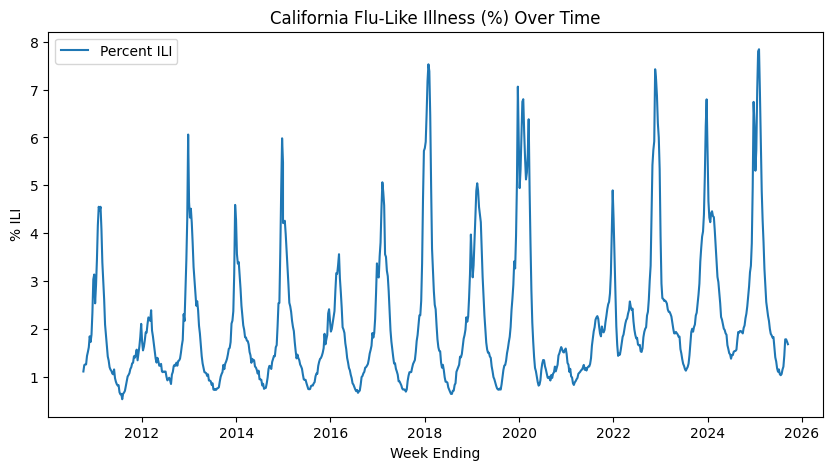

In [ ]:
# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(y, label='Percent ILI')
plt.title('California Flu-Like Illness (%) Over Time')
plt.xlabel('Week Ending')
plt.ylabel('% ILI')
plt.legend()
plt.show()

In [ ]:
# Check stationarity (ADF test)
result = adfuller(y.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Series likely non-stationary. Differencing recommended.")
else:
    print("Series likely stationary.")

ADF Statistic: -6.976276019290137
p-value: 8.412875941765864e-10
Series likely stationary.


In [ ]:
# Split data into train/test
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]


In [ ]:
#attempting to log transform the data so the sarima performs better
import numpy as np
y_log = np.log1p(y)   # log(1 + y) handles zeros safely


In [ ]:
#trying SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(y_log, order=(2,1,2), seasonal_order=(1,1,1,52))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       % WEIGHTED ILI   No. Observations:                  781
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 52)   Log Likelihood                1052.043
Date:                              Mon, 10 Nov 2025   AIC                          -2090.086
Time:                                      02:49:51   BIC                          -2057.954
Sample:                                           0   HQIC                         -2077.688
                                              - 781                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8164      1.527      0.535      0.593      -2.176       3.809
ar.L2         -0.1637      0.896     -0.183      0.855      -1.919       1.592
ma.L1         -0.4015      1.524     -0.264      0.792      -3.388       2.585
ma.L2          0.0841      0.258      0.326      0.744      -0.421       0.589
ar.S.L52       0.1707      0.058      2.952      0.003       0.057       0.284
ma.S.L52      -0.6589      0.047    -14.021      0.000      -0.751      -0.567
sigma2         0.0032      0.000     26.306      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               137.47
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.14
Prob(H) (two-sided):                  0.16   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

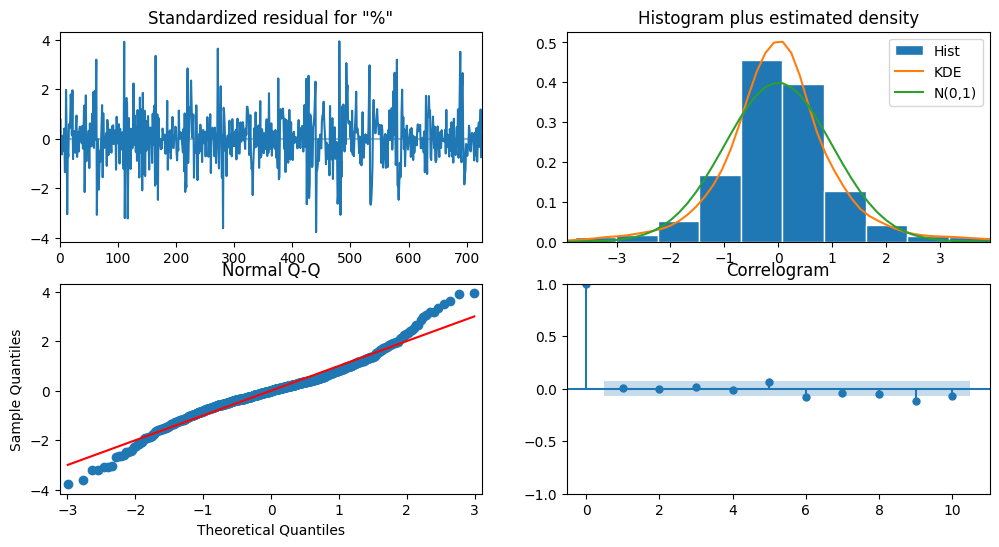

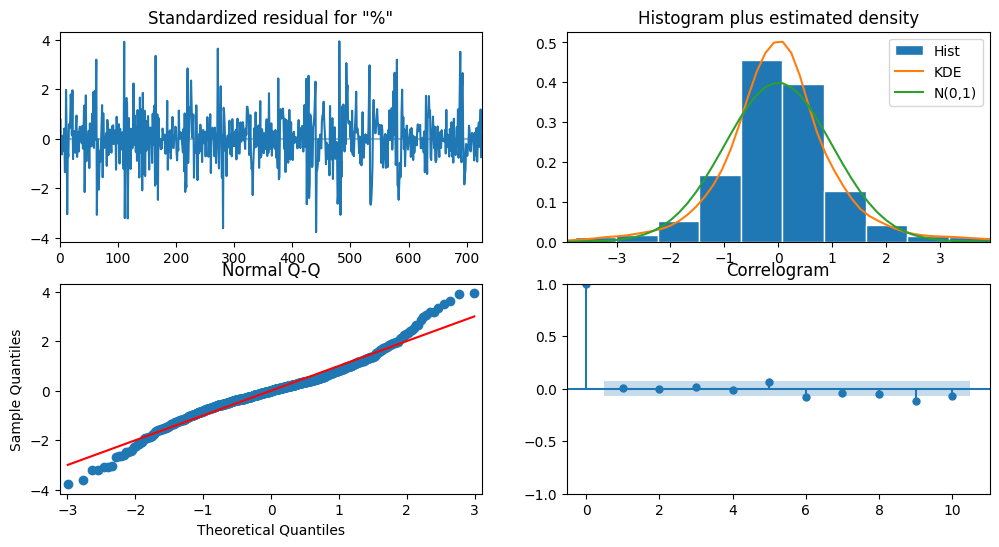

In [ ]:
#plotting the SARIMA model residual plots

model_fit.plot_diagnostics(figsize=(12,6))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


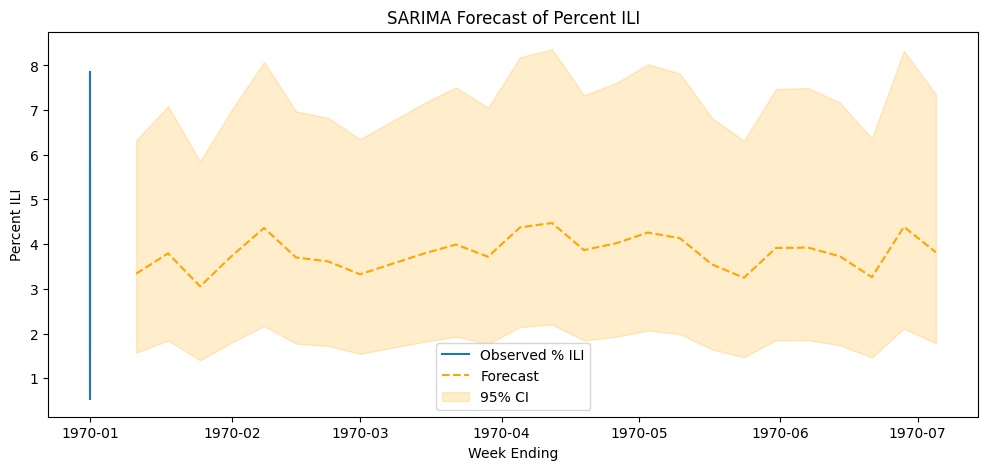

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecast n weeks ahead
n_steps = 26
pred = model_fit.get_forecast(steps=n_steps)

# forecast mean and confidence intervals
forecast_mean = np.expm1(pred.predicted_mean)
forecast_ci = np.expm1(pred.conf_int())


last_date = y.index[-1]
future_index = pd.date_range(start=last_date, periods=n_steps+1, freq='W')[1:]
forecast_mean.index = future_index
forecast_ci.index = future_index


plt.figure(figsize=(12,5))
plt.plot(y, label='Observed % ILI')
plt.plot(forecast_mean, label='Forecast', color = 'orange', linestyle='--')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:,1], color='orange', alpha=0.2, label='95% CI')
plt.title('SARIMA Forecast of Percent ILI')
plt.xlabel('Week Ending')
plt.ylabel('Percent ILI')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


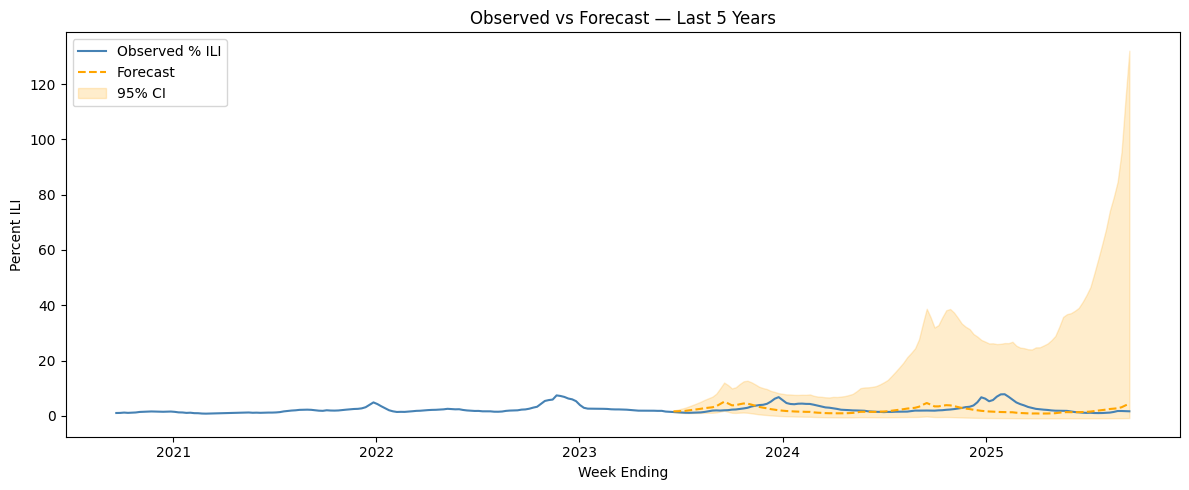

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# forecast the same number of weeks as test set
n_steps = len(test)
pred = model_fit.get_forecast(steps=n_steps)
forecast_mean = np.expm1(pred.predicted_mean)
forecast_ci = np.expm1(pred.conf_int())

# Align forecast index with test set
forecast_mean.index = test.index[:n_steps]
forecast_ci.index = test.index[:n_steps]

# Filter to last 5 years of data
cutoff_date = y.index.max() - pd.DateOffset(years=5)
observed_last5 = y[y.index >= cutoff_date]
forecast_last5 = forecast_mean[forecast_mean.index >= cutoff_date]
ci_last5 = forecast_ci[forecast_ci.index >= cutoff_date]

# observed vs forecast
plt.figure(figsize=(12,5))
plt.plot(observed_last5, label='Observed % ILI', color='steelblue')
plt.plot(forecast_last5, label='Forecast', color='orange', linestyle='--')
plt.fill_between(ci_last5.index,
                 ci_last5.iloc[:,0],
                 ci_last5.iloc[:,1],
                 color='orange', alpha=0.2, label='95% CI')
plt.title('Observed vs Forecast — Last 5 Years')
plt.xlabel('Week Ending')
plt.ylabel('Percent ILI')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Forecast the same number of weeks as test set
n_steps = len(test)
pred = model_fit.get_forecast(steps=n_steps)
forecast_mean = np.expm1(pred.predicted_mean)

# Make sure indexes match
forecast_mean.index = test.index[:n_steps]

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f"Test RMSE: {rmse:.3f}")




Test RMSE: 1.348


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


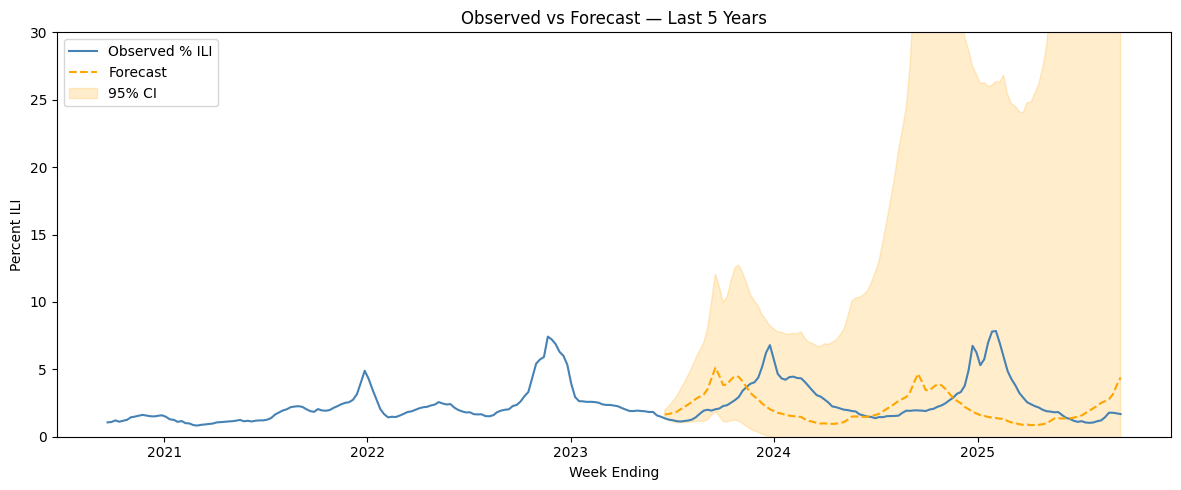

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(observed_last5, label='Observed % ILI', color='steelblue')
plt.plot(forecast_last5, label='Forecast', color='orange', linestyle='--')
plt.fill_between(ci_last5.index,
                 ci_last5.iloc[:,0],
                 ci_last5.iloc[:,1],
                 color='orange', alpha=0.2, label='95% CI')

plt.title('Observed vs Forecast — Last 5 Years')
plt.xlabel('Week Ending')
plt.ylabel('Percent ILI')
plt.legend()
plt.tight_layout()

# 👇 limit y-axis from 0 to 30
plt.ylim(0, 30)

plt.show()
